# Supervised classification

In the data.csv there are letters (uppercases and lowercases) and numbers, 28x28 pixels in a row format.

* First, you need to know which labels are which, meaning you need to visualize some data to realize which number labels represents a letter, or a number.

In [15]:
# Import libraries
import pandas as pd
import numpy as np
import zipfile

In [16]:
# Your code here
zip_all=zipfile.ZipFile('data_all.zip')
data=pd.read_csv(zip_all.open('data_all.csv'))
data.head()

,e,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


* Now, try to train a classifier model to predict the uppercases. Use every single model you know for classification.

In [17]:
# Your code here
data.e.unique()

array([36.,  0.,  3., 33., 30., 24., 40.,  5.,  8.,  2.,  4., 47.,  7.,
       32., 60., 18., 46., 59., 12., 37., 53., 15.,  1.,  9., 38., 43.,
       44., 19., 55.,  6., 58., 41., 20., 29., 28., 31., 42., 39., 25.,
       49., 35., 14., 57., 34., 26., 61., 11., 13., 27., 51., 23., 10.,
       22., 56., 48., 52., 16., 17., 54., 21., 50., 45.])

In [18]:
matriz=data.values
matriz

array([[36.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 3.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [28.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 5.,  0.,  0., ...,  0.,  0.,  0.]])

In [19]:
matriz.shape

(116322, 785)

In [20]:
import matplotlib.pyplot as plt
import matplotlib.image as img

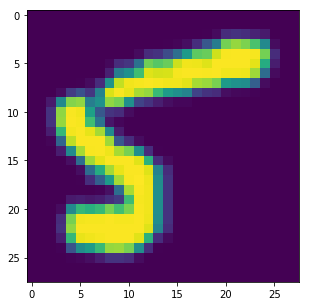

In [31]:
plt.figure(figsize=(5,5))
plt.imshow(matriz[116321, 1:].reshape(28,28))
plt.show()

In [32]:
upper = data[(data.e>9)&(data.e<=36)]
upper.shape

(32989, 785)

In [33]:
lower = data[(data.e>36)]
lower.shape

(25415, 785)

In [34]:
num = data[(data.e<=9)]
num.shape

(57918, 785)

In [38]:
# Your code here
from sklearn.model_selection import train_test_split

X_train_upp, X_test_upp, y_train_upp, y_test_upp=train_test_split(upper.drop('e',axis=1),upper['e'],test_size=0.2)
X_train_low, X_test_low, y_train_low, y_test_low=train_test_split(lower.drop('e',axis=1),lower['e'],test_size=0.2)
X_train_num, X_test_num, y_train_num, y_test_num=train_test_split(num.drop('e',axis=1),num['e'],test_size=0.2)


In [36]:
# Your code here
from sklearn.naive_bayes import GaussianNB as GNB
gnb=GNB()
gnb.fit(X_train_upp, y_train_upp)

train_score=gnb.score(X_train_upp, y_train_upp)
test_score=gnb.score(X_test_upp, y_test_upp)

print (train_score, test_score)

0.537759084536395 0.5145498635950287


In [39]:
gnb.fit(X_train_low, y_train_low)

train_score=gnb.score(X_train_low, y_train_low)
test_score=gnb.score(X_test_low, y_test_low)

print (train_score, test_score)

0.41191225654141256 0.4156993901239426


In [40]:
gnb.fit(X_train_num, y_train_num)

train_score=gnb.score(X_train_num, y_train_num)
test_score=gnb.score(X_test_num, y_test_num)

print (train_score, test_score)

0.6496309405620063 0.6454592541436464


In [27]:
from sklearn.tree import DecisionTreeClassifier as DTC
dtc=DTC()
dtc.fit(X_train_upp, y_train_upp)

train_score=dtc.score(X_train_upp, y_train_upp)
test_score=dtc.score(X_test_upp, y_test_upp)

print (train_score, test_score)

1.0 0.7265838132767505


In [42]:
dtc.fit(X_train_low, y_train_low)

train_score=dtc.score(X_train_low, y_train_low)
test_score=dtc.score(X_test_low, y_test_low)

print (train_score, test_score)

1.0 0.7349990163289396


In [41]:
dtc.fit(X_train_num, y_train_num)

train_score=dtc.score(X_train_num, y_train_num)
test_score=dtc.score(X_test_num, y_test_num)

print (train_score, test_score)

1.0 0.884064226519337


In [28]:
from sklearn.naive_bayes import MultinomialNB as MNB
mnb=MNB()
mnb.fit(X_train_upp, y_train_upp)

train_score=mnb.score(X_train_upp, y_train_upp)
test_score=mnb.score(X_test_upp, y_test_upp)

print (train_score, test_score)

0.6770489939752188 0.6686874810548651


In [43]:
mnb.fit(X_train_low, y_train_low)

train_score=mnb.score(X_train_low, y_train_low)
test_score=mnb.score(X_test_low, y_test_low)

print (train_score, test_score)

0.6613712374581939 0.6586661420421012


In [44]:
mnb.fit(X_train_num, y_train_num)

train_score=mnb.score(X_train_num, y_train_num)
test_score=mnb.score(X_test_num, y_test_num)

print (train_score, test_score)

0.8182544136055596 0.81353591160221
